# API Test

In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0596e169-8f63-4ac9-9350-08346f0a258f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-03-06T13:37:07.428Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 8912}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10851, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [13]:
type(data)

dict

In [33]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10851,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964628e+07,1.964628e+07,False,NaN,1,NaN,NaN,None,2024-03-06T13:57:00.000Z,66554.561304,1.061704e+11,37.3070,0.487133,-1.710220,10.147946,53.403745,52.116977,53.784834,1.307550e+12,52.4959,1.397646e+12,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
1,1027,Ethereum,ETH,ethereum,8503,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201198e+08,1.201198e+08,True,NaN,2,NaN,NaN,None,2024-03-06T13:57:00.000Z,3843.439150,5.249502e+10,57.3688,0.282186,1.821441,14.731487,65.146682,71.618721,70.936068,4.616731e+11,18.6109,4.616731e+11,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
2,825,Tether USDt,USDT,tether,77080,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.004403e+11,1.038001e+11,True,NaN,3,NaN,NaN,None,2024-03-06T13:56:00.000Z,1.000225,1.935549e+11,36.8964,-0.004924,-0.052895,-0.021049,0.115285,-0.041729,-0.006572,1.004629e+11,4.0498,1.038235e+11,None,2024-03-06T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-06 17:12:20.398216
3,1839,BNB,BNB,bnb,2083,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495297e+08,1.495297e+08,False,NaN,4,NaN,NaN,None,2024-03-06T13:56:00.000Z,422.453320,4.063392e+09,60.6244,0.081386,0.487541,2.126349,39.546593,38.130633,83.211434,6.316932e+10,2.5397,6.316932e+10,None,2024-03-06T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
4,5426,Solana,SOL,solana,634,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.424831e+08,5.712085e+08,True,NaN,5,NaN,NaN,None,2024-03-06T13:57:00.000Z,128.059203,9.776300e+09,105.1010,-0.916092,-3.579287,13.893800,30.551513,35.721047,100.148935,5.666404e+10,2.2750,7.314851e+10,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
5,52,XRP,XRP,xrp,1240,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-06T13:57:00.000Z,0.602901,4.477052e+09,14.3470,-0.110203,-7.490061,2.723330,18.863213,6.304040,-4.590002,3.295702e+10,1.3263,6.029015e+10,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
6,3408,USDC,USDC,usd-coin,17053,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.897168e+10,2.897168e+10,False,NaN,7,NaN,NaN,None,2024-03-06T13:57:00.000Z,1.000057,1.901087e+10,49.9143,0.009955,-0.000098,0.039021,-0.010858,0.006093,-0.011465,2.897334e+10,1.1649,2.897334e+10,None,2024-03-06T13:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-06 17:12:20.398216
7,2010,Cardano,ADA,cardano,1088,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.548926e+10,3.668585e+10,False,NaN,8,NaN,NaN,None,2024-03-06T13:56:00.000Z,0.716056,2.159227e+09,52.1001,-0.213407,-7.638667,12.851743,42.211079,37.175323,64.315175,2.541231e+10,1.0217,3.222253e+10,None,2024-03-06T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
8,74,Dogecoin,DOGE,dogecoin,905,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN

In [35]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0596e169-8f63-4ac9-9350-08346f0a258f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now')
df# = df.append(df2)

if not os.path.isfile(r'C:\Users\Admin\Documents\Python Scripts\API.csv'):
    df.to_csv(r'C:\Users\Admin\Documents\Python Scripts\API.csv', header = 'column_names')
else: 
    df.to_csv(r'C:\Users\Admin\Documents\Python Scripts\API.csv', mode = 'a', header = False)

{'status': {'timestamp': '2024-03-06T14:18:59.081Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 8913}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10861, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [36]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()    

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r'C:\Users\Admin\Documents\Python Scripts\API.csv')
df72

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10851,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964628e+07,1.964628e+07,False,NaN,1,NaN,NaN,None,2024-03-06T13:57:00.000Z,66554.561304,1.061704e+11,37.3070,0.487133,-1.710220,10.147946,53.403745,52.116977,53.784834,1.307550e+12,52.4959,1.397646e+12,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
1,1027,Ethereum,ETH,ethereum,8503,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201198e+08,1.201198e+08,True,NaN,2,NaN,NaN,None,2024-03-06T13:57:00.000Z,3843.439150,5.249502e+10,57.3688,0.282186,1.821441,14.731487,65.146682,71.618721,70.936068,4.616731e+11,18.6109,4.616731e+11,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
2,825,Tether USDt,USDT,tether,77080,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.004403e+11,1.038001e+11,True,NaN,3,NaN,NaN,None,2024-03-06T13:56:00.000Z,1.000225,1.935549e+11,36.8964,-0.004924,-0.052895,-0.021049,0.115285,-0.041729,-0.006572,1.004629e+11,4.0498,1.038235e+11,None,2024-03-06T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-06 17:12:20.398216
3,1839,BNB,BNB,bnb,2083,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495297e+08,1.495297e+08,False,NaN,4,NaN,NaN,None,2024-03-06T13:56:00.000Z,422.453320,4.063392e+09,60.6244,0.081386,0.487541,2.126349,39.546593,38.130633,83.211434,6.316932e+10,2.5397,6.316932e+10,None,2024-03-06T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
4,5426,Solana,SOL,solana,634,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.424831e+08,5.712085e+08,True,NaN,5,NaN,NaN,None,2024-03-06T13:57:00.000Z,128.059203,9.776300e+09,105.1010,-0.916092,-3.579287,13.893800,30.551513,35.721047,100.148935,5.666404e+10,2.2750,7.314851e+10,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
5,52,XRP,XRP,xrp,1240,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-06T13:57:00.000Z,0.602901,4.477052e+09,14.3470,-0.110203,-7.490061,2.723330,18.863213,6.304040,-4.590002,3.295702e+10,1.3263,6.029015e+10,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
6,3408,USDC,USDC,usd-coin,17053,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.897168e+10,2.897168e+10,False,NaN,7,NaN,NaN,None,2024-03-06T13:57:00.000Z,1.000057,1.901087e+10,49.9143,0.009955,-0.000098,0.039021,-0.010858,0.006093,-0.011465,2.897334e+10,1.1649,2.897334e+10,None,2024-03-06T13:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-06 17:12:20.398216
7,2010,Cardano,ADA,cardano,1088,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.548926e+10,3.668585e+10,False,NaN,8,NaN,NaN,None,2024-03-06T13:56:00.000Z,0.716056,2.159227e+09,52.1001,-0.213407,-7.638667,12.851743,42.211079,37.175323,64.315175,2.541231e+10,1.0217,3.222253e+10,None,2024-03-06T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
8,74,Dogecoin,DOGE,dogecoin,905,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10851,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964628e+07,1.964628e+07,False,NaN,1,NaN,NaN,None,2024-03-06T13:57:00.000Z,66554.561304,1.061704e+11,37.3070,0.487133,-1.710220,10.147946,53.403745,52.116977,53.784834,1.307550e+12,52.4959,1.397646e+12,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
1,1027,Ethereum,ETH,ethereum,8503,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201198e+08,1.201198e+08,True,NaN,2,NaN,NaN,None,2024-03-06T13:57:00.000Z,3843.439150,5.249502e+10,57.3688,0.282186,1.821441,14.731487,65.146682,71.618721,70.936068,4.616731e+11,18.6109,4.616731e+11,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
2,825,Tether USDt,USDT,tether,77080,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.004403e+11,1.038001e+11,True,NaN,3,NaN,NaN,None,2024-03-06T13:56:00.000Z,1.000225,1.935549e+11,36.8964,-0.004924,-0.052895,-0.021049,0.115285,-0.041729,-0.006572,1.004629e+11,4.0498,1.038235e+11,None,2024-03-06T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-06 17:12:20.398216
3,1839,BNB,BNB,bnb,2083,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495297e+08,1.495297e+08,False,NaN,4,NaN,NaN,None,2024-03-06T13:56:00.000Z,422.453320,4.063392e+09,60.6244,0.081386,0.487541,2.126349,39.546593,38.130633,83.211434,6.316932e+10,2.5397,6.316932e+10,None,2024-03-06T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
4,5426,Solana,SOL,solana,634,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.424831e+08,5.712085e+08,True,NaN,5,NaN,NaN,None,2024-03-06T13:57:00.000Z,128.059203,9.776300e+09,105.1010,-0.916092,-3.579287,13.893800,30.551513,35.721047,100.148935,5.666404e+10,2.2750,7.314851e+10,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
5,52,XRP,XRP,xrp,1240,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-06T13:57:00.000Z,0.602901,4.477052e+09,14.3470,-0.110203,-7.490061,2.723330,18.863213,6.304040,-4.590002,3.295702e+10,1.3263,6.029015e+10,None,2024-03-06T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
6,3408,USDC,USDC,usd-coin,17053,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.897168e+10,2.897168e+10,False,NaN,7,NaN,NaN,None,2024-03-06T13:57:00.000Z,1.000057,1.901087e+10,49.9143,0.009955,-0.000098,0.039021,-0.010858,0.006093,-0.011465,2.897334e+10,1.1649,2.897334e+10,None,2024-03-06T13:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-06 17:12:20.398216
7,2010,Cardano,ADA,cardano,1088,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.548926e+10,3.668585e+10,False,NaN,8,NaN,NaN,None,2024-03-06T13:56:00.000Z,0.716056,2.159227e+09,52.1001,-0.213407,-7.638667,12.851743,42.211079,37.175323,64.315175,2.541231e+10,1.0217,3.222253e+10,None,2024-03-06T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-06 17:12:20.398216
8,74,Dogecoin,DOGE,dogecoin,905,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN

In [38]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.487133,-1.710220,10.147946,53.403745,52.116977,53.784834
Ethereum,0.282186,1.821441,14.731487,65.146682,71.618721,70.936068
Tether USDt,-0.004924,-0.052895,-0.021049,0.115285,-0.041729,-0.006572
BNB,0.081386,0.487541,2.126349,39.546593,38.130633,83.211434
Solana,-0.916092,-3.579287,13.893800,30.551513,35.721047,100.148935
XRP,-0.110203,-7.490061,2.723330,18.863213,6.304040,-4.590002
USDC,0.009955,-0.000098,0.039021,-0.010858,0.006093,-0.011465
Cardano,-0.213407,-7.638667,12.851743,42.211079,37.175323,64.315175
Dogecoin,0.298790,-14.319120,65.328240,104.621467,102.640210,73.083655


In [39]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h       0.487133
             quote.USD.percent_change_24h     -1.710220
             quote.USD.percent_change_7d      10.147946
             quote.USD.percent_change_30d     53.403745
             quote.USD.percent_change_60d     52.116977
             quote.USD.percent_change_90d     53.784834
Ethereum     quote.USD.percent_change_1h       0.282186
             quote.USD.percent_change_24h      1.821441
             quote.USD.percent_change_7d      14.731487
             quote.USD.percent_change_30d     65.146682
             quote.USD.percent_change_60d     71.618721
             quote.USD.percent_change_90d     70.936068
Tether USDt  quote.USD.percent_change_1h      -0.004924
             quote.USD.percent_change_24h     -0.052895
             quote.USD.percent_change_7d      -0.021049
             quote.USD.percent_change_30d      0.115285
             quote.USD.percent_change_60d     -0.041729
      

In [40]:
type(df4)

pandas.core.series.Series

In [41]:
type(df3)

pandas.core.frame.DataFrame

In [42]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin     quote.USD.percent_change_1h     0.487133
            quote.USD.percent_change_24h   -1.710220
            quote.USD.percent_change_7d    10.147946
            quote.USD.percent_change_30d   53.403745
            quote.USD.percent_change_60d   52.116977
            quote.USD.percent_change_90d   53.784834
Ethereum    quote.USD.percent_change_1h     0.282186
            quote.USD.percent_change_24h    1.821441
            quote.USD.percent_change_7d    14.731487
            quote.USD.percent_change_30d   65.146682
            quote.USD.percent_change_60d   71.618721
            quote.USD.percent_change_90d   70.936068
Tether USDt quote.USD.percent_change_1h    -0.004924
            quote.USD.percent_change_24h   -0.052895
            quote.USD.percent_change_7d    -0.021049
            quote.USD.percent_change_30d    0.115285
            quote.USD.percent_change_60d   -0.041729
            quote.USD.percent_change_90d   -0.006572
BNB         quote.USD.percent_change_1h     0.081386
            quote.USD.percent_change_24h    0.487541
            quote.USD.percent_change_7d     2.126349
            quote.USD.percent_change_30d   39.546593
            quote.USD.percent_change_60d   38.130633
            quote.USD.percent_change_90d   83.211434
Solana      quote.USD.percent_change_1h    -0.916092
            quote.USD.percent_change_24h   -3.579287
            quote.USD.percent_change_7d    13.893800
            quote.USD.percent_change_30d   30.551513
            quote.USD.percent_change_60d   35.721047
            quote.USD.percent_change_90d  100.148935
XRP         quote.USD.percent_change_1h    -0.110203
            quote.USD.percent_change_24h   -7.490061
            quote.USD.percent_change_7d     2.723330
            quote.USD.percent_change_30d   18.863213
            quote.USD.percent_change_60d    6.304040
            quote.USD.percent_change_90d   -4.590002
USDC        quote.USD.percent_change_1h     0.009955
            quote.USD.percent_change_24h   -0.000098
            quote.USD.percent_change_7d     0.039021
            quote.USD.percent_change_30d   -0.010858
            quote.USD.percent_change_60d    0.006093
            quote.USD.percent_change_90d   -0.011465
Cardano     quote.USD.percent_change_1h    -0.213407
            quote.USD.percent_change_24h   -7.638667
            quote.USD.percent_change_7d    12.851743
            quote.USD.percent_change_30d   42.211079
            quote.USD.percent_change_60d   37.175323
            quote.USD.percent_change_90d   64.315175
Dogecoin    quote.USD.percent_change_1h     0.298790
            quote.USD.percent_change_24h  -14.319120
            quote.USD.percent_change_7d    65.328240
            quote.USD.percent_change_30d  104.621467
            quote.USD.percent_change_60d  102.640210
            quote.USD.percent_change_90d   73.083655
Shiba Inu   quote.USD.percent_change_1h     0.896439
            quote.USD.percent_change_24h  -18.875925
            quote.USD.percent_change_7d   211.766531
            quote.USD.percent_change_30d  285.256084
            quote.USD.percent_change_60d  261.683501
            quote.USD.percent_change_90d  262.386130
Avalanche   quote.USD.percent_change_1h    -0.439378
            quote.USD.percent_change_24h   -6.660255
            quote.USD.percent_change_7d     0.045879
            quote.USD.percent_change_30d   12.169389
            quote.USD.percent_change_60d   15.497086
            quote.USD.percent_change_90d   52.456185
Polkadot    quote.USD.percent_change_1h    -0.656247
            quote.USD.percent_change_24h   -5.396609
            quote.USD.percent_change_7d    16.023227
            quote.USD.percent_change_30d   43.179848
            quote.USD.percent_change_60d   37.805737
            quote.USD.percent_change_90d   64.997394
TRON        quote.USD.percent_change_1h    -0.239128
            quote.USD.percent_change_24h   -1.997626
            quote.

In [43]:
df5.count()

values    90
dtype: int64

In [45]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.487133
1,Bitcoin,quote.USD.percent_change_24h,-1.710220
2,Bitcoin,quote.USD.percent_change_7d,10.147946
3,Bitcoin,quote.USD.percent_change_30d,53.403745
4,Bitcoin,quote.USD.percent_change_60d,52.116977
5,Bitcoin,quote.USD.percent_change_90d,53.784834
6,Ethereum,quote.USD.percent_change_1h,0.282186
7,Ethereum,quote.USD.percent_change_24h,1.821441
8,Ethereum,quote.USD.percent_change_7d,14.731487
9,Ethereum,quote.USD.percent_change_30d,65.146682


In [47]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.487133
1,Bitcoin,quote.USD.percent_change_24h,-1.710220
2,Bitcoin,quote.USD.percent_change_7d,10.147946
3,Bitcoin,quote.USD.percent_change_30d,53.403745
4,Bitcoin,quote.USD.percent_change_60d,52.116977
5,Bitcoin,quote.USD.percent_change_90d,53.784834
6,Ethereum,quote.USD.percent_change_1h,0.282186
7,Ethereum,quote.USD.percent_change_24h,1.821441
8,Ethereum,quote.USD.percent_change_7d,14.731487
9,Ethereum,quote.USD.percent_change_30d,65.146682


In [53]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.487133
1,Bitcoin,24h,-1.710220
2,Bitcoin,7d,10.147946
3,Bitcoin,30d,53.403745
4,Bitcoin,60d,52.116977
5,Bitcoin,90d,53.784834
6,Ethereum,1h,0.282186
7,Ethereum,24h,1.821441
8,Ethereum,7d,14.731487
9,Ethereum,30d,65.146682


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


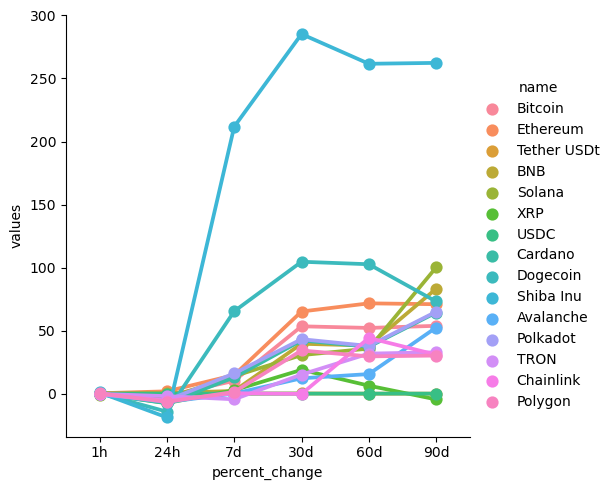

In [54]:
sns.catplot(x='percent_change', y= 'values', hue= 'name', data = df7, kind= 'point')

In [55]:
df10 = df[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66554.561304,2024-03-06 17:12:20.398216
1,Ethereum,3843.439150,2024-03-06 17:12:20.398216
2,Tether USDt,1.000225,2024-03-06 17:12:20.398216
3,BNB,422.453320,2024-03-06 17:12:20.398216
4,Solana,128.059203,2024-03-06 17:12:20.398216
5,XRP,0.602901,2024-03-06 17:12:20.398216
6,USDC,1.000057,2024-03-06 17:12:20.398216
7,Cardano,0.716056,2024-03-06 17:12:20.398216
8,Dogecoin,0.163398,2024-03-06 17:12:20.398216
9,Shiba Inu,0.000035,2024-03-06 17:12:20.398216


In [56]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'") #if you want to just look at bitcoin
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66554.561304,2024-03-06 17:12:20.398216


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

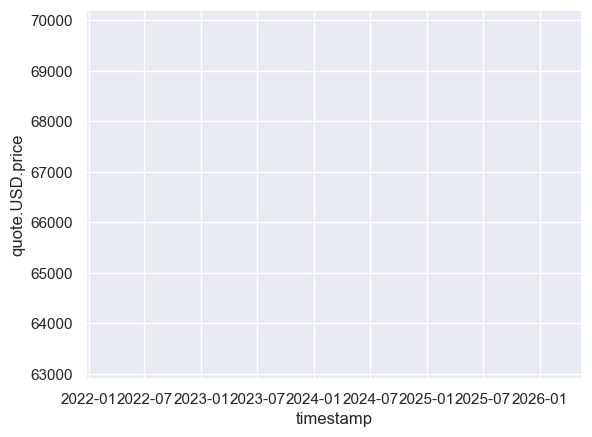

In [57]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)